In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [197]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [198]:
df = pd.read_excel('heart_disease_dataset.xlsx')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [200]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [201]:
import seaborn as sns
corrmat = df.corr()
corrmat
#top_corr_features = corrmat.index
#top_corr_features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [202]:
df[top_corr_features]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


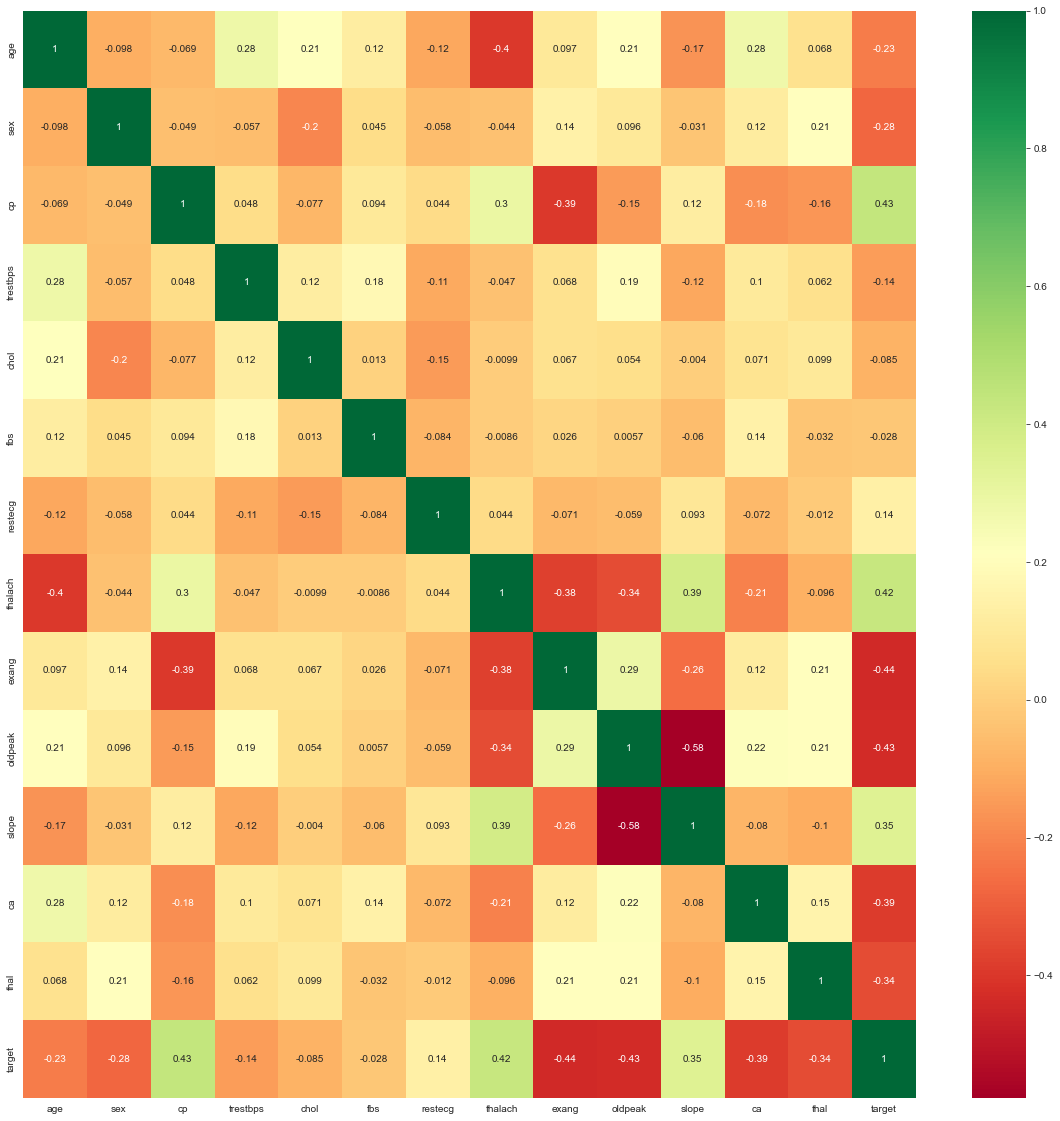

In [203]:
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heatmap
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<Figure size 1440x1440 with 0 Axes>

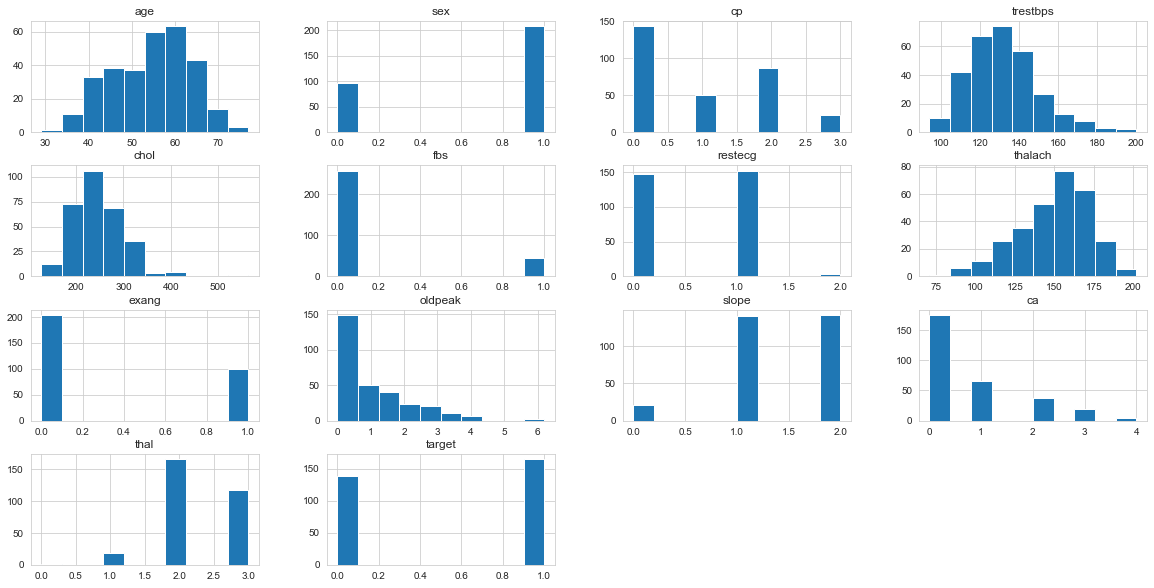

<Figure size 1440x1440 with 0 Axes>

In [230]:
df.hist()
plt.figure(figsize=(20,20))

<AxesSubplot: xlabel='target', ylabel='count'>

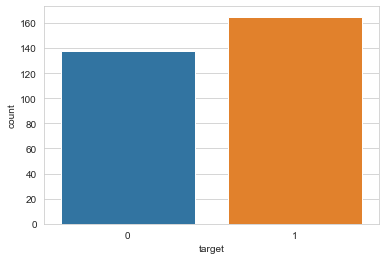

In [205]:
#to check if dataset is balanced or not
sns.set_style("whitegrid")
sns.countplot(x="target",data=df)

In [206]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [207]:
#convert categorical to dummies
dataset = pd.get_dummies(df, columns = ['sex','cp','fbs','restecg','thal','slope', 'ca', 'exang'])

In [208]:
dataset

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,exang_0,exang_1
0,63,145,233,150,2.3,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,0,0,1,1,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,1
299,45,110,264,132,1.2,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
300,68,144,193,141,3.4,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
301,57,130,131,115,1.2,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1


In [209]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [210]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,exang_0,exang_1
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,0,0,1,1,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,0,0,1,1,0,0,0,0,0,1


In [211]:
y = dataset.target
X = dataset.drop(['target'],axis=1)

In [212]:
X

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,exang_0,exang_1
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,1,1,0,0,...,0,1,0,0,1,0,0,0,0,1


In [213]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## KNN

In [214]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

In [215]:
len(knn_scores)

20

<Figure size 1440x1440 with 0 Axes>

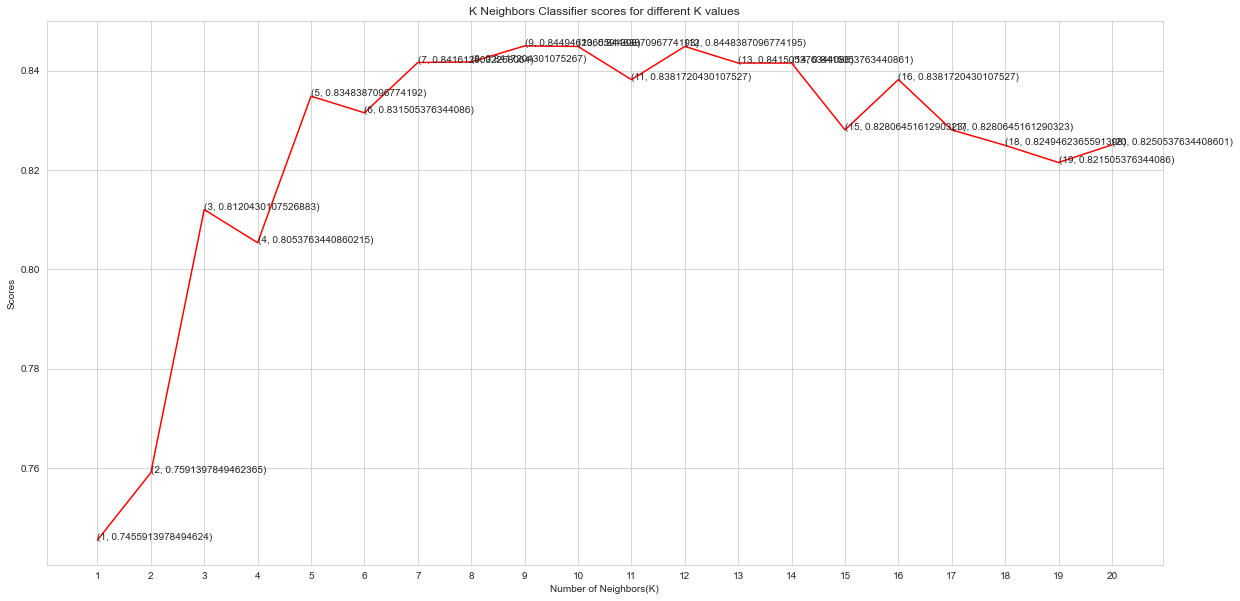

<Figure size 1440x1440 with 0 Axes>

In [231]:
plt.plot([k for k in range(1,21)],knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('Number of Neighbors(K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

plt.figure(figsize=(20,20))

In [217]:
knn_scores[12-1]

0.8448387096774195

In [218]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [219]:
y_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8688524590163934
Precision: 0.9666666666666667
Recall: 0.8055555555555556


In [220]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score = cross_val_score(knn_classifier,X,y,cv=10)

In [221]:
score.mean()

0.8448387096774195

## Decision Tree

In [222]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [223]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, splitter='random')
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [224]:
score_decTree = cross_val_score(clf,X,y,cv=10)

In [225]:
score_decTree.mean()

0.7981720430107526

In [226]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8360655737704918


## Random Forest

In [227]:
from sklearn.ensemble import RandomForestClassifier

In [233]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [234]:
y_pred = rf.predict(X_test)

In [235]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8524590163934426


In [228]:
score_randomFoClass = cross_val_score(randomFClassifier,X,y,cv=10)

In [229]:
score_randomFoClass.mean()

0.8082795698924731

#### Using RandomSearchCV
RandomSearchCV randomly search parameters within a range per hyperparameter. It will train many models and save each one as variables, the code below creates a variable for the best model

In [240]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the dat
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fdc034c7a60>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fdc03b83a60>})

In [242]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 5, 'n_estimators': 185}


In [243]:
rf = RandomForestClassifier(max_depth=5, n_estimators=185)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=185)

In [244]:
y_pred = rf.predict(X_test)

In [245]:
score_randomFoClass = cross_val_score(randomFClassifier,X,y,cv=10)

In [247]:
score_randomFoClass.mean()

0.8079569892473119